<a href="https://colab.research.google.com/github/HelmyPurnomoHidayat22/Aplikasi-Login/blob/main/stres_detection%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
# Membaca dataset (misalnya dataset.csv)
data = pd.read_csv('stress_detection.csv')

# Menampilkan beberapa baris pertama untuk melihat struktur data
print(data.head())


   participant_id  day  PSS_score  Openness  Conscientiousness  Extraversion  \
0               1    1         34  2.322732           4.332193      1.185878   
1               1    2         37  1.761436           3.254120      3.907281   
2               1    3         30  3.025887           1.855002      2.045900   
3               1    4         16  1.948370           4.966676      3.345225   
4               1    5         32  3.343484           2.065936      3.137843   

   Agreeableness  Neuroticism  sleep_time  wake_time  sleep_duration  \
0       1.570213     3.782094    7.726792   5.190660        6.572069   
1       4.072512     1.997145    7.312674   6.170717        8.030168   
2       2.317493     3.619225    6.992060   5.318825        7.102420   
3       1.607756     3.583524    8.886914   8.061075        8.123294   
4       2.118061     2.567347    7.811705   7.312145        7.785143   

   PSQI_score  call_duration  num_calls  num_sms  screen_on_time  \
0           1     

In [3]:
# Mengatasi data yang hilang (jika ada)
data = data.dropna()

# Menentukan fitur dan target
X = data[['sleep_time', 'PSS_score', 'Openness', 'Conscientiousness', 'Extraversion',
          'Agreeableness', 'Neuroticism', 'PSQI_score', 'screen_on_time',
          'skin_conductance', 'accelerometer', 'mobility_radius', 'mobility_distance']]

y = data['PSS_score']  # Skor PSS yang ingin diprediksi


In [4]:
# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [5]:
# Membuat dan melatih model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Melatih model dengan data latih
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [6]:
# Memprediksi nilai stres pada data uji
y_pred = model.predict(X_test)

# Menghitung Mean Squared Error (MSE) dan R^2 score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


Mean Squared Error: 0.0
R^2 Score: 1.0


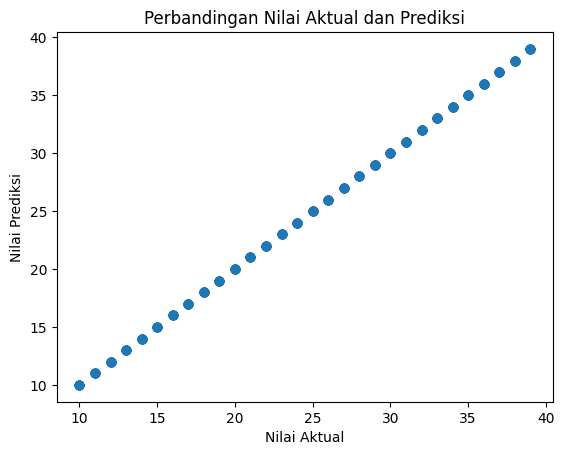

In [7]:
# Menampilkan plot antara nilai aktual dan prediksi
plt.scatter(y_test, y_pred)
plt.xlabel('Nilai Aktual')
plt.ylabel('Nilai Prediksi')
plt.title('Perbandingan Nilai Aktual dan Prediksi')
plt.show()


In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import pickle


In [15]:
# Membaca dataset
data = pd.read_csv('stress_detection.csv')

# Memilih kolom-kolom yang relevan untuk model
X = data[['sleep_duration', 'PSS_score', 'Openness', 'Extraversion', 'Agreeableness']]
y = data['PSS_score']  # Misalnya, kita prediksi PSS_score

# Membagi data menjadi data latih dan uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Membuat dan melatih model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Menyimpan model yang telah dilatih
with open('stress_detection_model.pkl', 'wb') as f:
    pickle.dump(model, f)


In [ ]:
# Fungsi untuk prediksi level stres berdasarkan input pengguna
def predict_stress(sleep_duration, PSS_score, Openness, Extraversion, Agreeableness):
    # Memuat model yang sudah dilatih
    with open('stress_detection_model.pkl', 'rb') as f:
        model = pickle.load(f)

    # Membuat dataframe dari input pengguna
    input_data = pd.DataFrame([[sleep_duration, PSS_score, Openness, Extraversion, Agreeableness]],
                              columns=['sleep_duration', 'PSS_score', 'Openness', 'Extraversion', 'Agreeableness'])

    # Melakukan prediksi
    predicted_stress = model.predict(input_data)

    return predicted_stress[0]

# Mengambil input dari pengguna
sleep_duration = float(input("Masukkan durasi tidur (jam) : "))
PSS_score = int(input("Masukkan Skor Skala Stres yang Dirasakan : "))
Openness = float(input("Masukkan skor keterbukaan terhadap pengalaman  "))
Extraversion = float(input("Masukkan skor ekstroversi : "))
Agreeableness = float(input("Masukkan skor keramahan : "))

# Memprediksi tingkat stres berdasarkan input
predicted_stress = predict_stress(sleep_duration, PSS_score, Openness, Extraversion, Agreeableness)

# Menampilkan hasil prediksi
print(f"Tingkat stres yang diprediksi: {predicted_stress:.2f}")


In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import pickle

# Membaca dataset
data = pd.read_csv('stress_detection.csv')

# Memilih kolom-kolom yang relevan untuk model
X = data[['sleep_time', 'PSS_score', 'Openness', 'Conscientiousness', 'Extraversion',
          'Agreeableness', 'Neuroticism', 'PSQI_score', 'screen_on_time',
          'skin_conductance', 'accelerometer', 'mobility_radius', 'mobility_distance']]
y = data['PSS_score']  # Skor PSS yang ingin diprediksi

# Membagi data menjadi data latih dan uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Membuat dan melatih model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Menyimpan model yang telah dilatih
with open('stress_detection_model.pkl', 'wb') as f:
    pickle.dump(model, f)


# Fungsi untuk prediksi tingkat stres berdasarkan input pengguna
def predict_stress(sleep_time, PSS_score, Openness, Conscientiousness, Extraversion,
                   Agreeableness, Neuroticism, PSQI_score, screen_on_time, skin_conductance,
                   accelerometer, mobility_radius, mobility_distance):
    # Memuat model yang sudah dilatih
    with open('stress_detection_model.pkl', 'rb') as f:
        model = pickle.load(f)

    # Membuat dataframe dari input pengguna
    input_data = pd.DataFrame([[sleep_time, PSS_score, Openness, Conscientiousness, Extraversion,
                                Agreeableness, Neuroticism, PSQI_score, screen_on_time, skin_conductance,
                                accelerometer, mobility_radius, mobility_distance]],
                              columns=['sleep_time', 'PSS_score', 'Openness', 'Conscientiousness', 'Extraversion',
                                       'Agreeableness', 'Neuroticism', 'PSQI_score', 'screen_on_time',
                                       'skin_conductance', 'accelerometer', 'mobility_radius', 'mobility_distance'])

    # Melakukan prediksi
    predicted_stress = model.predict(input_data)

    return predicted_stress[0]


# Fungsi untuk mengklasifikasikan tingkat stres
def classify_stress(predicted_stress):
    if predicted_stress <= 20:
        return "Stres Rendah"
    elif 21 <= predicted_stress <= 30:
        return "Stres Sedang"
    else:
        return "Stres Tinggi"


# Mengambil input dari pengguna
sleep_time = float(input("Masukkan durasi tidur (jam) [6.0 - 9.0]: "))
PSS_score = int(input("Masukkan Skor Skala Stres yang Dirasakan [10 - 40]: "))
Openness = float(input("Masukkan skor keterbukaan terhadap pengalaman [1.0 - 5.0]: "))
Conscientiousness = float(input("Masukkan skor kehati-hatian [1.0 - 5.0]: "))
Extraversion = float(input("Masukkan skor ekstroversi [1.0 - 5.0]: "))
Agreeableness = float(input("Masukkan skor keramahan [1.0 - 5.0]: "))
Neuroticism = float(input("Masukkan skor neurotisme [1.0 - 5.0]: "))
PSQI_score = int(input("Masukkan skor PSQI (Pittsburgh Sleep Quality Index) [1 - 5]: "))
screen_on_time = float(input("Masukkan total waktu layar menyala (jam) [1.0 - 12.0]: "))
skin_conductance = float(input("Masukkan konduktansi kulit (µS) [0.5 - 5.0]: "))
accelerometer = float(input("Masukkan data akselerometer (g) [0.1 - 2.5]: "))
mobility_radius = float(input("Masukkan radius mobilitas (km) [0.1 - 1.5]: "))
mobility_distance = float(input("Masukkan jarak mobilitas (km) [0.5 - 5.0]: "))

# Memprediksi tingkat stres berdasarkan input
predicted_stress = predict_stress(sleep_time, PSS_score, Openness, Conscientiousness, Extraversion,
                                   Agreeableness, Neuroticism, PSQI_score, screen_on_time, skin_conductance,
                                   accelerometer, mobility_radius, mobility_distance)

# Menampilkan hasil prediksi dan klasifikasinya
print(f"Tingkat stres yang diprediksi: {predicted_stress:.2f}")
print(f"Klasifikasi: {classify_stress(predicted_stress)}")


Masukkan durasi tidur (jam) [6.0 - 9.0]: 9
Masukkan Skor Skala Stres yang Dirasakan [10 - 40]: 30
Masukkan skor keterbukaan terhadap pengalaman [1.0 - 5.0]: 4
Masukkan skor kehati-hatian [1.0 - 5.0]: 6
Masukkan skor ekstroversi [1.0 - 5.0]: 4
Masukkan skor keramahan [1.0 - 5.0]: 4
Masukkan skor neurotisme [1.0 - 5.0]: 4
Masukkan skor PSQI (Pittsburgh Sleep Quality Index) [1 - 5]: 4
Masukkan total waktu layar menyala (jam) [1.0 - 12.0]: 10
Masukkan konduktansi kulit (µS) [0.5 - 5.0]: 4
Masukkan data akselerometer (g) [0.1 - 2.5]: 2
Masukkan radius mobilitas (km) [0.1 - 1.5]: 1
Masukkan jarak mobilitas (km) [0.5 - 5.0]: 4
Tingkat stres yang diprediksi: 30.00
Klasifikasi: Stres Sedang
